# INTRODUCTION

The Cleveland heart disease data set is a well known medical field data set.This is mostly used for medical related researches and machine learning.The dataset consit of data collected from 303 indiciduals with the objective of predicting weather he has the presence of heart disease or not. The dataset includes 14 attributes: 13 features and 1 target variable. The target variable indicates whether the individual has heart disease (1) or not (0).

The features of the data set are listed as follows:

*Age: Age of the patient.
*Sex: Gender of the patient (1 = Male, 0 = Female) (nominal).
*cp (Chest Pain Type):
    0: Typical angina
    1: Atypical angina
    2: Non-anginal pain
    3: Asymptomatic (nominal).
*trestbps (Resting Blood Pressure): Resting blood pressure in mm/Hg (numeric).
*chol (Serum Cholesterol): Serum cholesterol level in mg/dl (numeric).
*fbs (Fasting Blood Sugar): Fasting blood sugar > 120 mg/dl (1 = True, 0 = False) (nominal).
*restecg (Resting Electrocardiogram Results):
    0: Normal
    1: ST-T wave abnormality
    2: Left ventricular hypertrophy (nominal).
*thalach (Maximum Heart Rate Achieved): Maximum heart rate achieved during exercise (numeric).
*exang (Exercise Induced Angina): Exercise-induced angina (1 = Yes, 0 = No) (nominal).
*oldpeak (ST Depression Induced by Exercise): ST depression induced by exercise relative to rest (numeric).
*slope (Slope of the Peak Exercise ST Segment):
    0: Upsloping
    1: Flat
    2: Downsloping (nominal).
*ca (Number of Major Vessels Colored by Fluoroscopy): Number of major vessels (0-3) colored by fluoroscopy (nominal).
*thal (Thalassemia):
    0: NULL
    1: Normal
    2: Fixed defect
    3: Reversible defect (nominal).
*target: The target variable indicating the presence (1) or absence (0) of heart disease.

Source: UCI Machine Learning Repository

# OBJCTIVE OF THE EDA

The objective to performing the EDA are as follows:

*To understand the Data Distribution, by analyzing the distribution of individual features to identify potential data imbalances, outliers, and the general statistical properties of the data.
*To understand the feature Relationships, investigating the relationships between different features and how they correlate with the presence or absence of heart disease. This may involve visualizing pairwise correlations and using statistical tests.
*To identifying Key Predictors, identifying which features are most indicative of heart disease presence, which *could involve feature selection techniques or domain-specific insights.
Perform data Preprocessing, assessing the need for data preprocessing steps such as normalization, scaling, or encoding of categorical variables to prepare the dataset for machine learning models.
*Target Distribution Analysis,for Examining the distribution of the target variable to check for class imbalances, which may influence model training and evaluation.
*Hypothesis Generation: Generating hypotheses about potential relationships between features and heart disease that can be tested with further statistical analysis or model building.


# DATA PREPROCESSING

In [89]:
import pandas as pd
from sklearn.preprocessing import StandardScaler #standardise numerical values


#loading the data set
data= r"/Users/malavikasanthosh/Downloads/Heart_disease_cleveland_new.csv"
dataold=pd.read_csv(data)
df=pd.read_csv(data)

#differenctiating numerical and categorical columns
numeric_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

#standrdising numerical values

scaler = StandardScaler()#mean of 0 and standard deviation of 1
df[numeric_features] = scaler.fit_transform(df[numeric_features])

#encoding the data
df['sex'] = df['sex'].replace({1: 'Male', 0: 'Female'})
df['cp'] = df['cp'].replace({0: 'Typical angina', 1: 'Atypical angina', 2: 'Non-anginal pain', 3: 'Asymptomatic'})
df['fbs'] = df['fbs'].replace({1: 'True', 0: 'False'})
df['restecg'] = df['restecg'].replace({0: 'Normal', 1: 'ST-T wave abnormality', 2: 'Left ventricular hypertrophy'})
df['exang'] = df['exang'].replace({1: 'Yes', 0: 'No'})
df['slope'] = df['slope'].replace({0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'})
df['thal'] = df['thal'].replace({1: 'Normal', 2: 'Fixed defect', 3: 'Reversible defect'})

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.948726,Male,Typical angina,0.757525,-0.264900,True,Left ventricular hypertrophy,0.017197,No,1.087338,Downsloping,0,Fixed defect,0
1,1.392002,Male,Asymptomatic,1.611220,0.760415,False,Left ventricular hypertrophy,-1.821905,Yes,0.397182,Flat,3,Normal,1
2,1.392002,Male,Asymptomatic,-0.665300,-0.342283,False,Left ventricular hypertrophy,-0.902354,Yes,1.346147,Flat,2,Reversible defect,1
3,-1.932564,Male,Non-anginal pain,-0.096170,0.063974,False,Normal,1.637359,No,2.122573,Downsloping,0,Normal,0
4,-1.489288,Female,Atypical angina,-0.096170,-0.825922,False,Left ventricular hypertrophy,0.980537,No,0.310912,Upsloping,0,Normal,0


# DESCREPTIVE STATISTICS

In [90]:
#Calculating the mean
mean_v=df[numeric_features].mean()
print("Mean:\n", mean_v)

#calculating the median
median_v=df[numeric_features].median()
print("\nMedian:\n", median_v)

# Calculating the mode
mode_v = df[numeric_features].mode().iloc[0]  #taking the first row
print("\nMode:\n", mode_v)

# Calculating the standard deviation
std_dev_v = df[numeric_features].std()
print("\nStandard Deviation:\n", std_dev_v)


Mean:
 age        -1.465641e-18
trestbps    4.426236e-16
chol        2.345026e-16
thalach    -1.172513e-16
oldpeak     2.345026e-17
dtype: float64

Median:
 age         0.172994
trestbps   -0.096170
chol       -0.110136
thalach     0.148562
oldpeak    -0.206705
dtype: float64

Mode:
 age         0.394632
trestbps   -0.665300
chol       -0.961341
thalach     0.542655
oldpeak    -0.896862
Name: 0, dtype: float64

Standard Deviation:
 age         1.001654
trestbps    1.001654
chol        1.001654
thalach     1.001654
oldpeak     1.001654
dtype: float64


In [91]:
#summary statistics into a single DataFrame 
summary_stats = pd.DataFrame({
    'Mean': mean_v,
    'Median': median_v,
    'Mode': mode_v,
    'Standard Deviation': std_dev_v
})

print("\nSummary Statistics:\n", summary_stats)



Summary Statistics:
                   Mean    Median      Mode  Standard Deviation
age      -1.465641e-18  0.172994  0.394632            1.001654
trestbps  4.426236e-16 -0.096170 -0.665300            1.001654
chol      2.345026e-16 -0.110136 -0.961341            1.001654
thalach  -1.172513e-16  0.148562  0.542655            1.001654
oldpeak   2.345026e-17 -0.206705 -0.896862            1.001654


# VISUALIZATION

# SCATTER PLOT

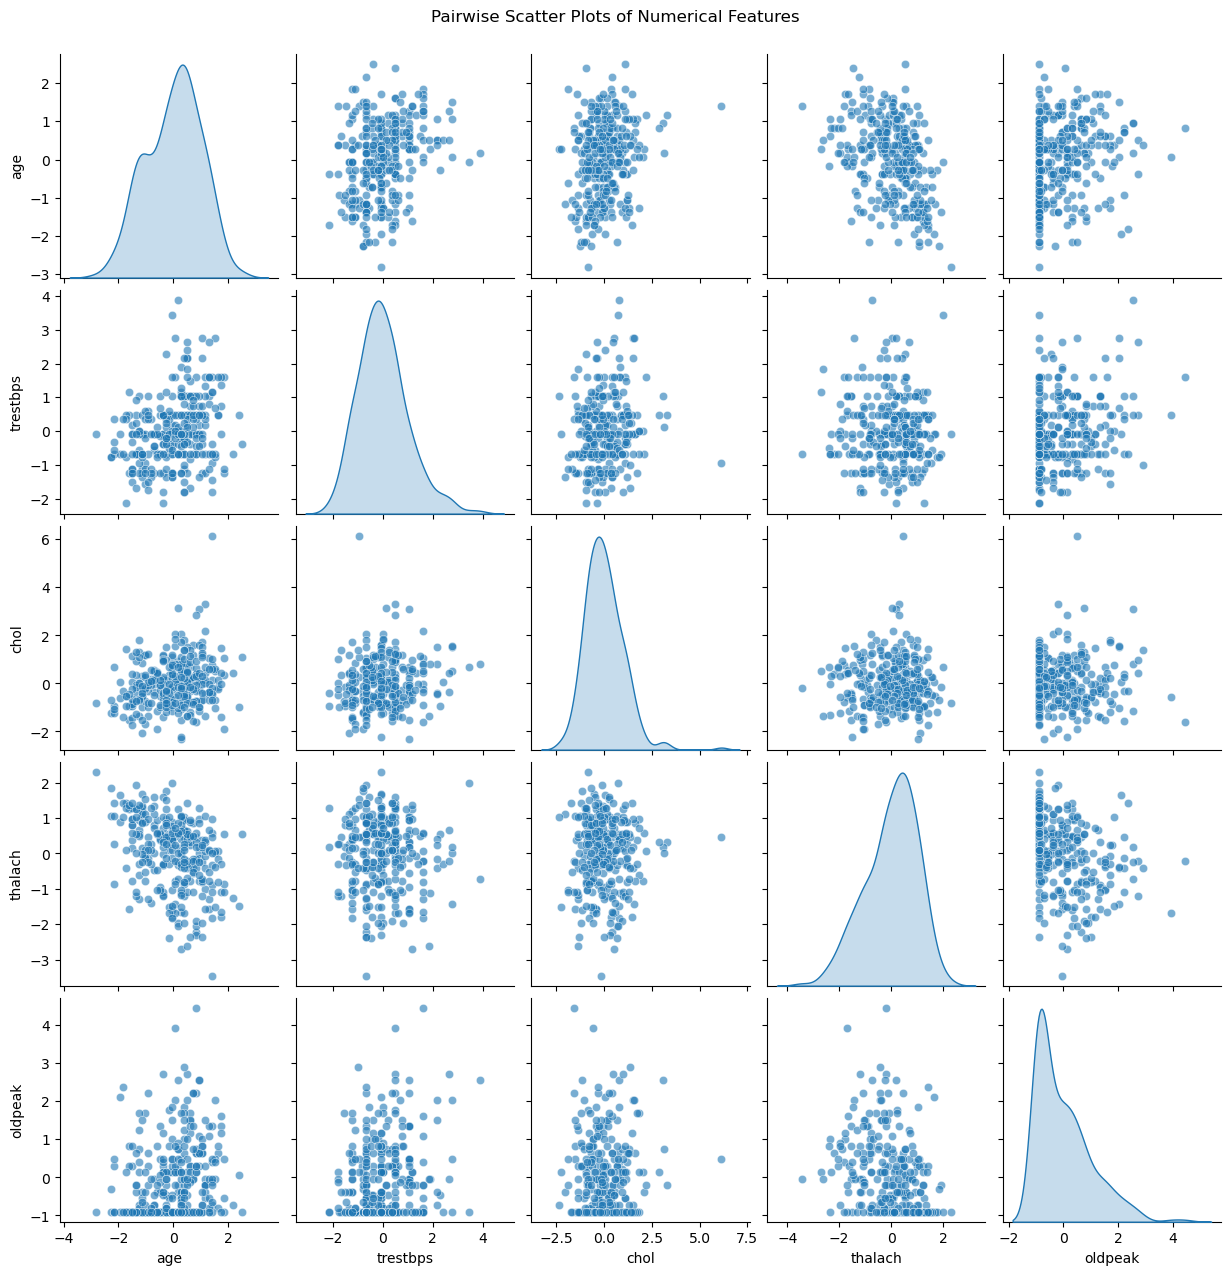

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#scatter plot
sns.pairplot(df[numeric_features],diag_kind="kde",plot_kws={'alpha':0.6})
#diagonal will show kernal density density estimation and alpha factor determines the transparency which helps in visualisation of overlapping points
plt.suptitle("Pairwise Scatter Plots of Numerical Features", y=1.02)
plt.show()

Some detailed scatter plot examples for each pair with age

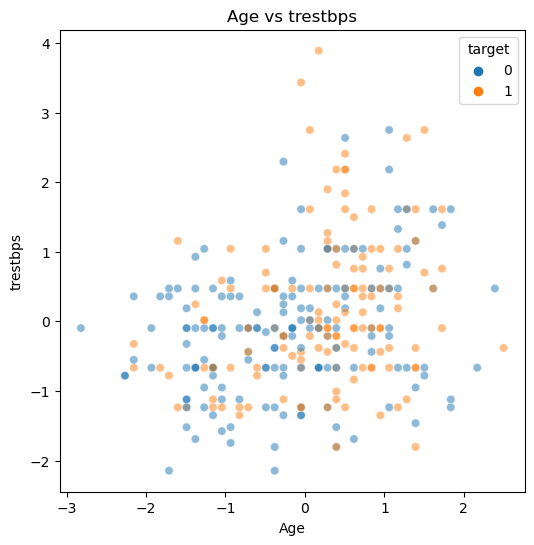

In [93]:
plt.figure(figsize=(6, 6))

sns.scatterplot(data=df, x="age", y="trestbps", hue="target", alpha=0.5)
plt.title("Age vs trestbps")
plt.xlabel("Age")
plt.ylabel("trestbps")
plt.show()

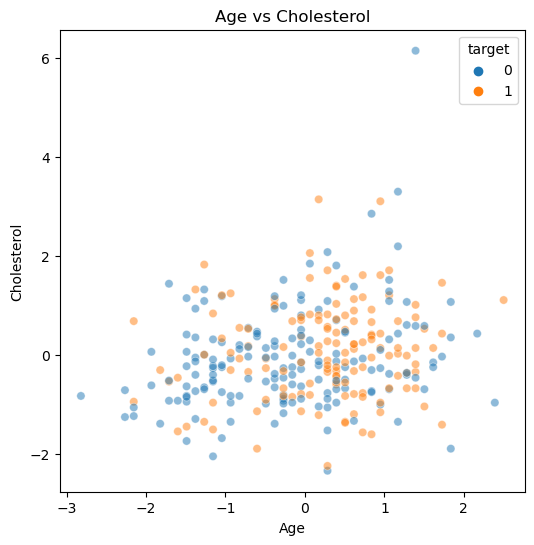

In [94]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="age", y="chol", hue="target", alpha=0.5)
plt.title("Age vs Cholesterol")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

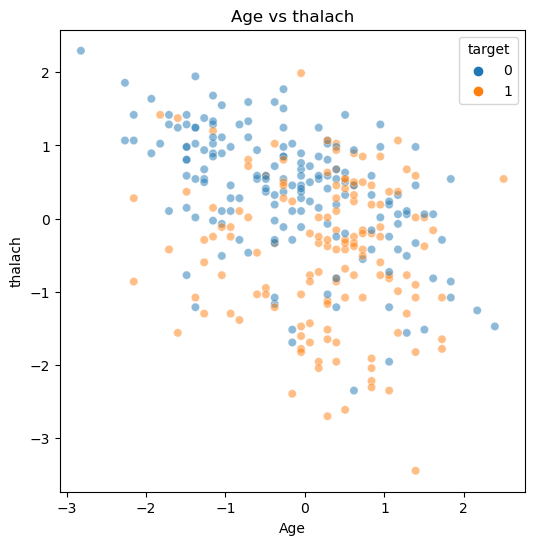

In [95]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="age", y="thalach", hue="target", alpha=0.5)
plt.title("Age vs thalach")
plt.xlabel("Age")
plt.ylabel("thalach")
plt.show()

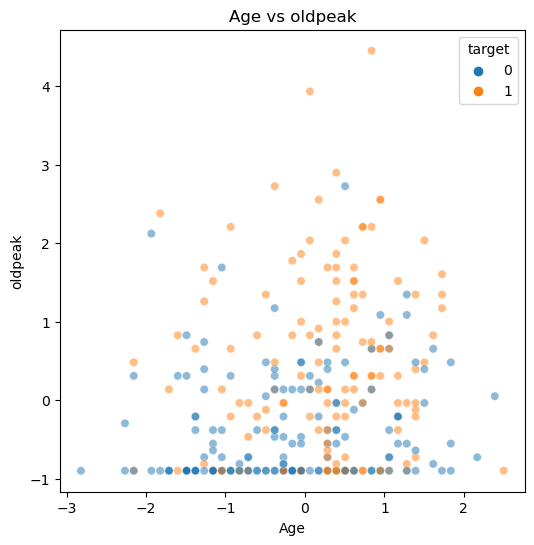

In [96]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="age", y="oldpeak", hue="target", alpha=0.5)
plt.title("Age vs oldpeak")
plt.xlabel("Age")
plt.ylabel("oldpeak")
plt.show()

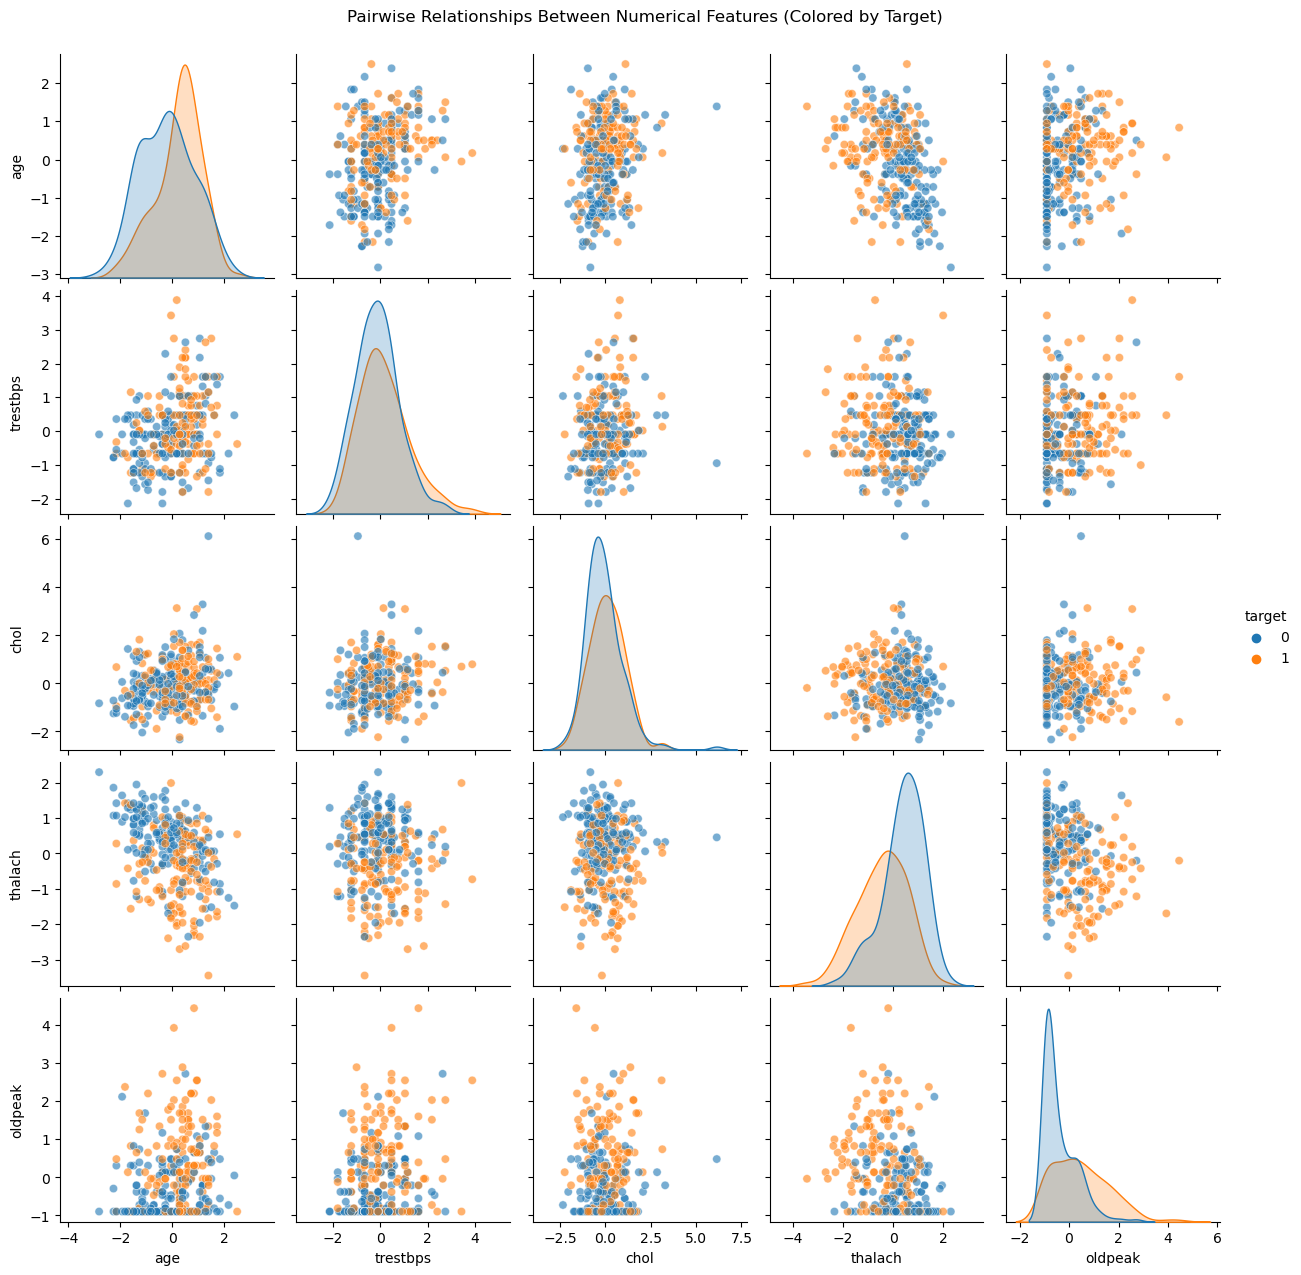

In [97]:
sns.pairplot(df, vars=numeric_features, hue="target", diag_kind="kde", plot_kws={'alpha':0.6})
plt.suptitle("Pairwise Relationships Between Numerical Features (Colored by Target)", y=1.02)
plt.show()

# BOXPLOT

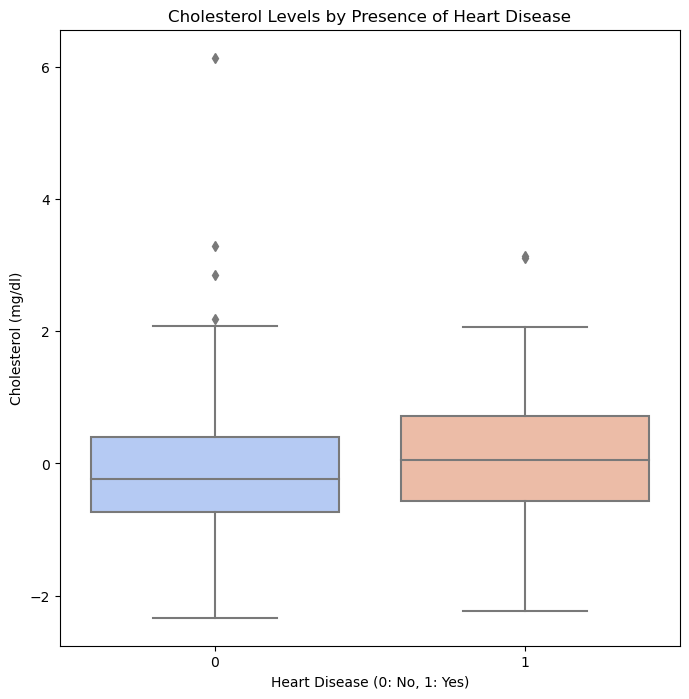

In [98]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df, x="target", y="chol", palette="coolwarm")
plt.title("Cholesterol Levels by Presence of Heart Disease")
plt.xlabel("Heart Disease (0: No, 1: Yes)")
plt.ylabel("Cholesterol (mg/dl)")
plt.show()

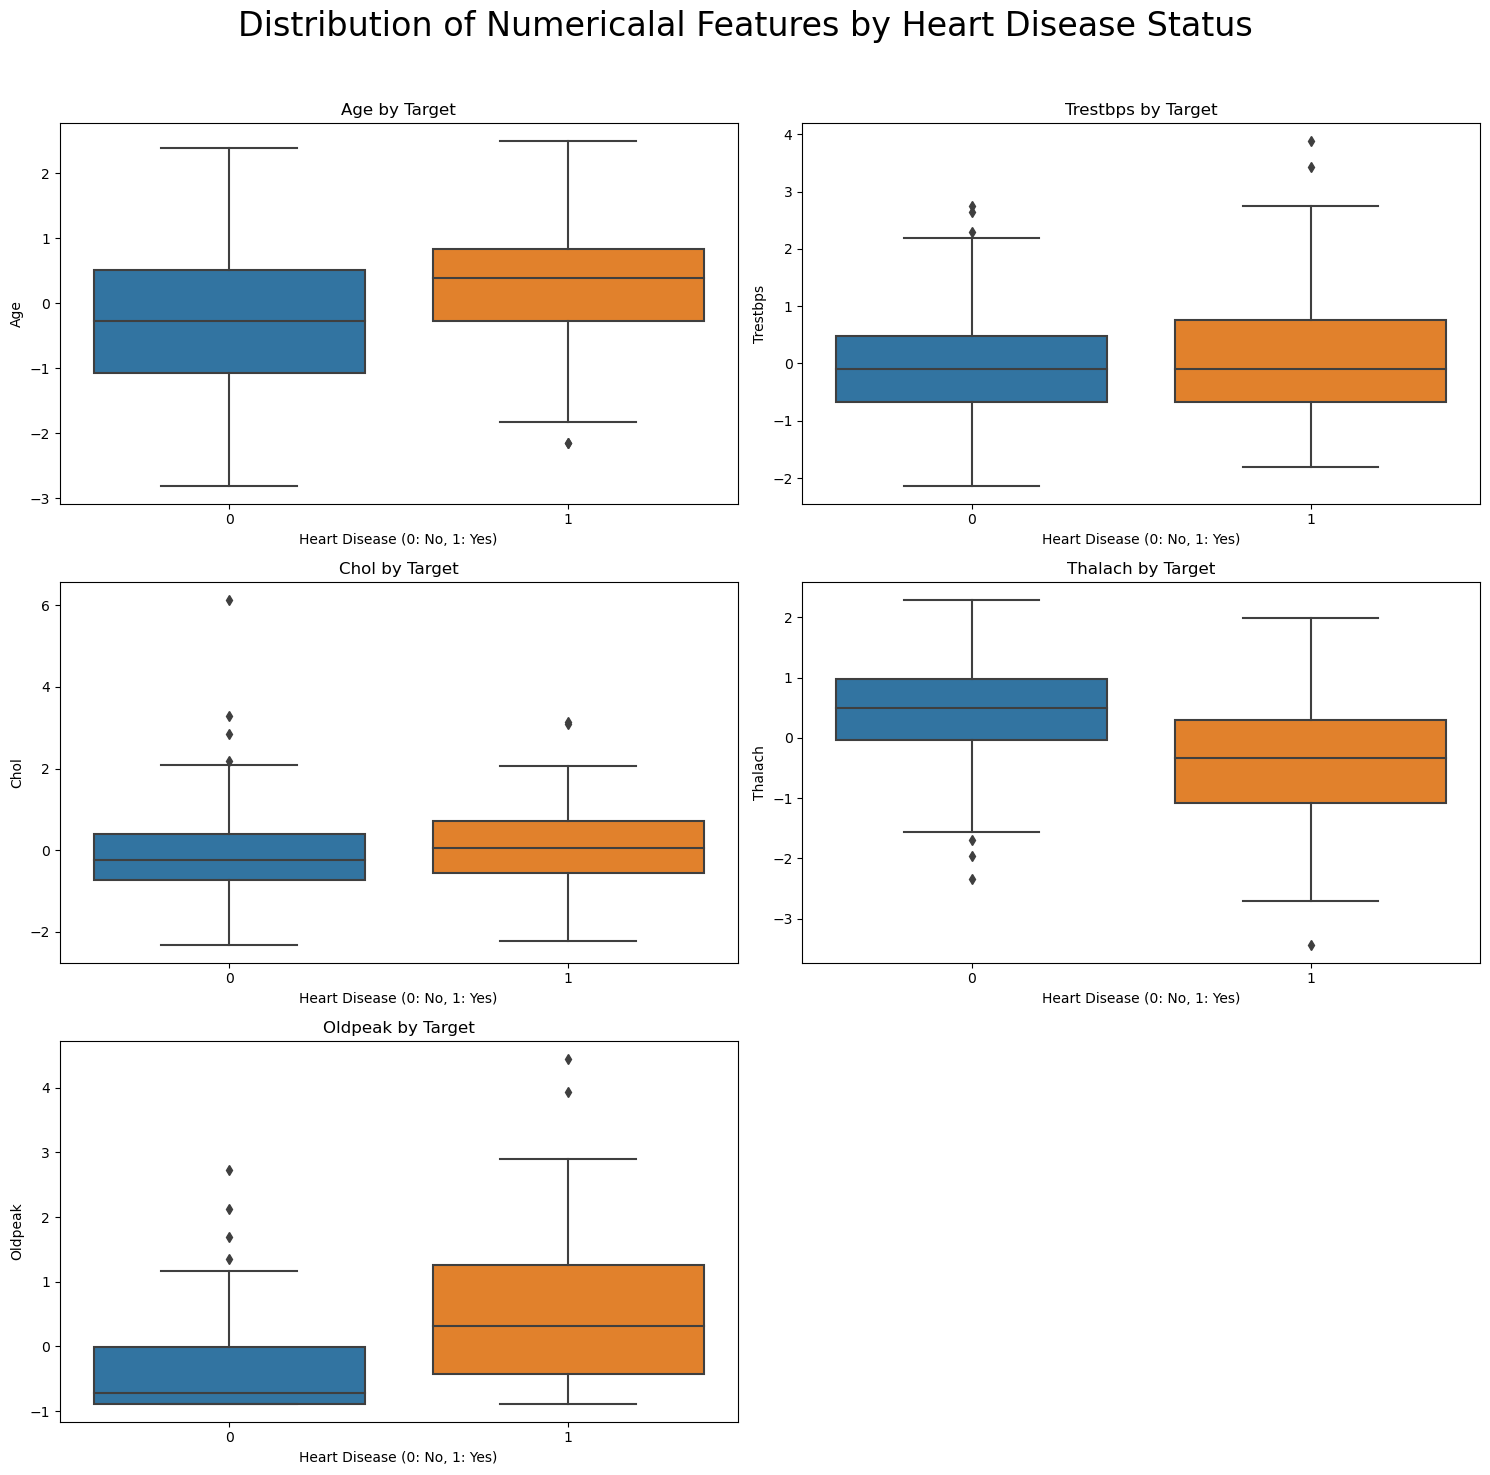

In [99]:
# box plot of more than one pair using subplot
# Setting up the figure and axes for the subplots
plt.figure(figsize=(15, 15))
plt.suptitle("Distribution of Numericalal Features by Heart Disease Status", fontsize=24)

for i, feature in enumerate(numeric_features):
    plt.subplot(3, 2, i + 1)  
    sns.boxplot(data=df, x="target", y=feature)
    plt.title(f"{feature.capitalize()} by Target")
    plt.xlabel("Heart Disease (0: No, 1: Yes)")
    plt.ylabel(feature.capitalize())
    
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The box plots provide a visual summary of how each numerical feature varies with the presence or absence of heart disease. While there are overlaps in some features, others like thalach (maximum heart rate) and oldpeak (ST depression) show clearer distinctions between the two groups. These insights can guide further analysis or feature selection for predictive modeling.

# HISTOGRAM

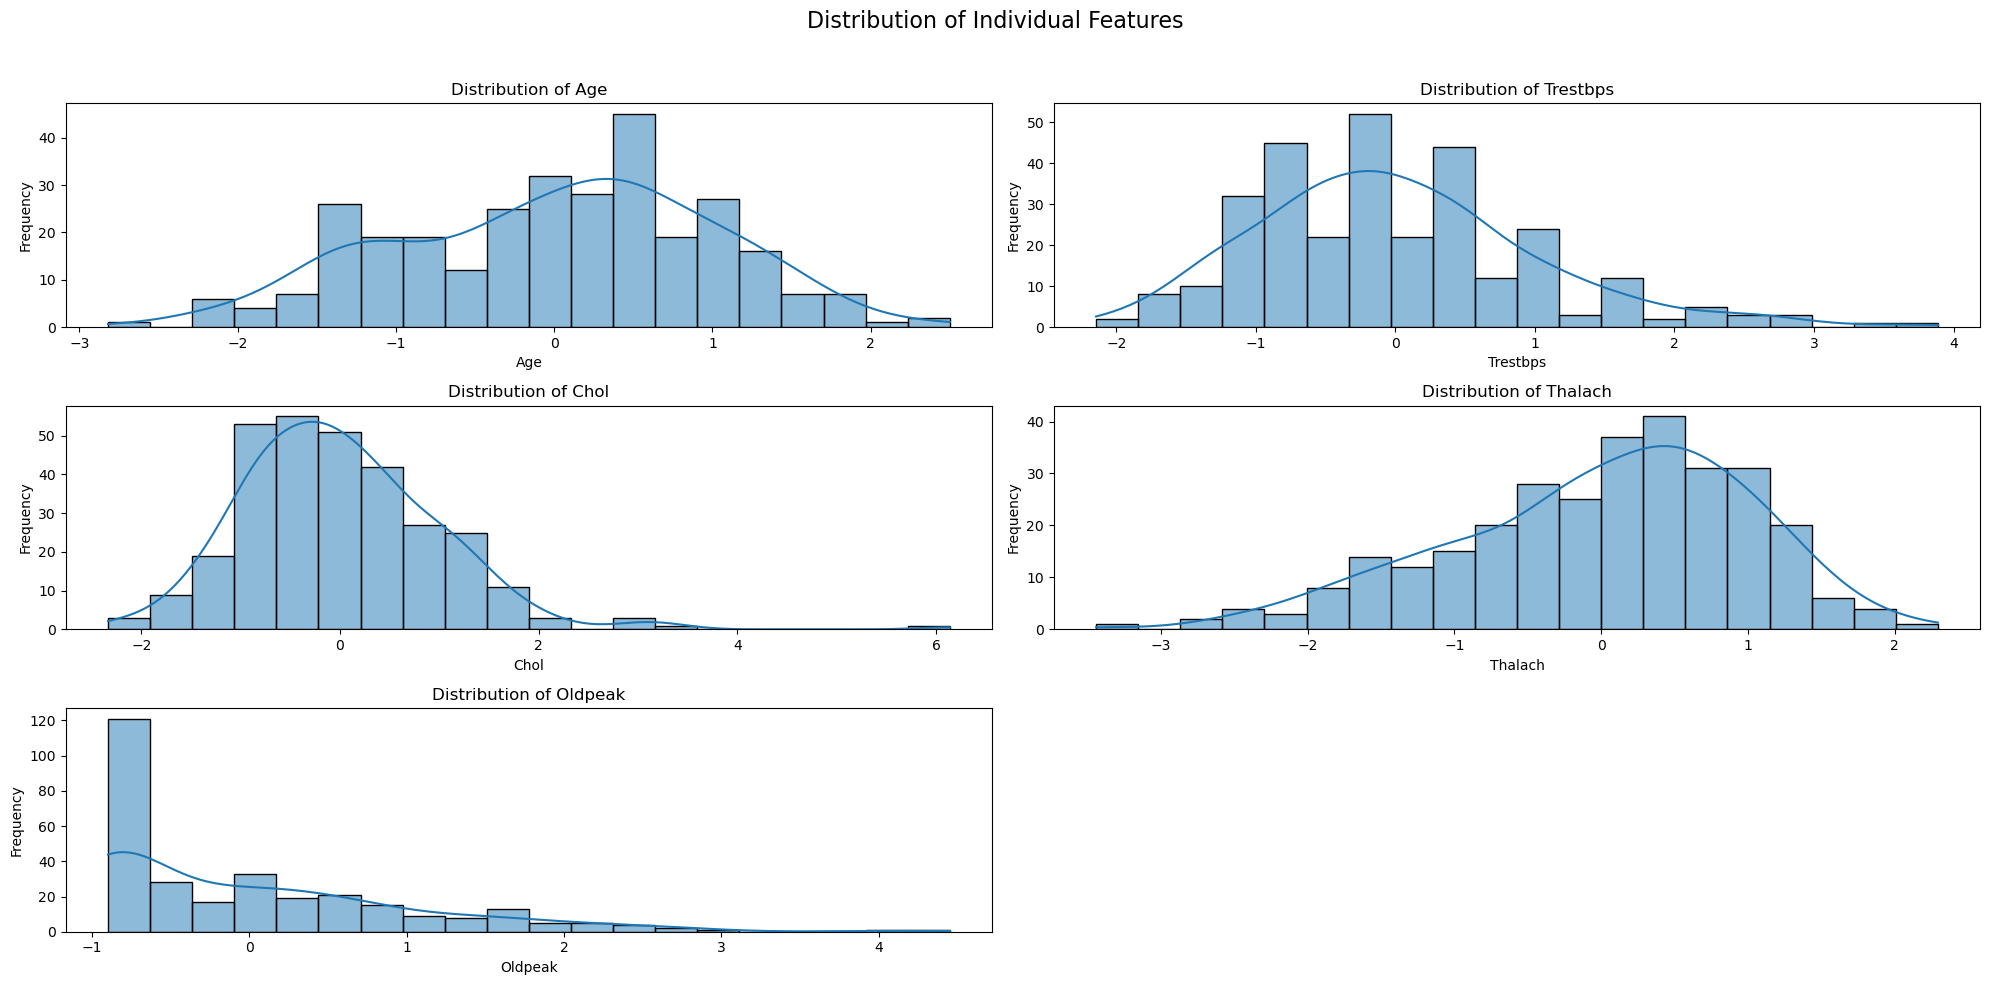

In [100]:
# combined histogram
features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
plt.figure(figsize=(20,10))
plt.suptitle("Distribution of Individual Features", fontsize=16)

# Loop through each feature and create a subplot
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)  
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f"Distribution of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


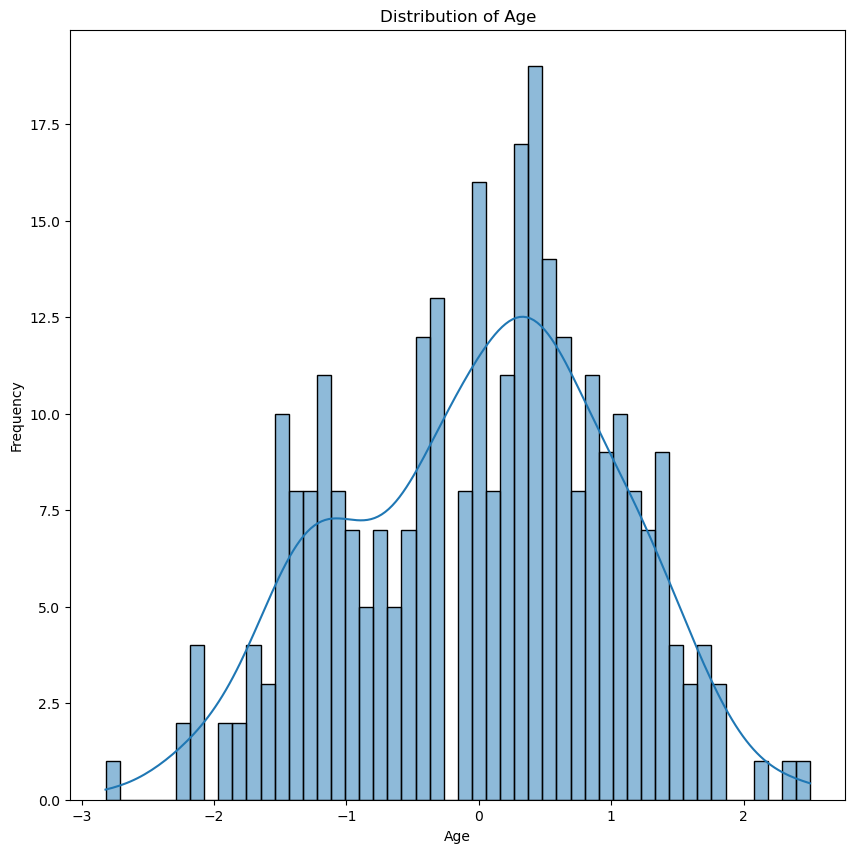

In [101]:
plt.figure(figsize=(10, 10))
sns.histplot(df['age'], bins=50, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

The histograms provide a comprehensive overview of the distribution of key numerical features in the dataset. These distributions offer insights into the typical range of values for patients with heart disease and can help in identifying patterns and potential risk factors.


# CORRELATION HEATMAP

/var/folders/r3/rhzxcc890rv1rs41ynytj24w0000gn/T/ipykernel_789/78025924.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix=df.corr()


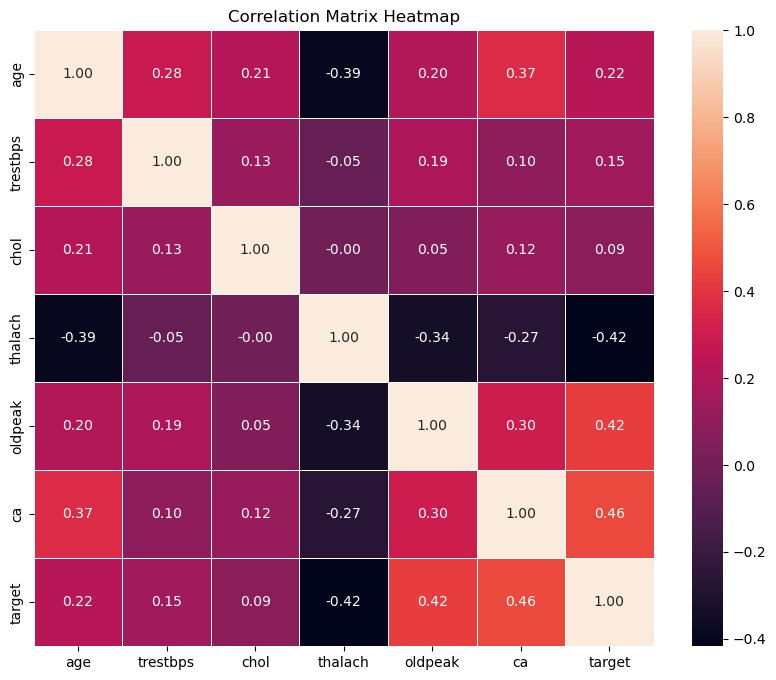

In [102]:
corrmatrix=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrmatrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

The heatmap provides the visual summary of how features in the dataset are related to each other.Also this helps in identifying which features are strongly or weakly correlated.This also helps in guiding feature selection and engineering for predictive models.

# VIOLIN PLOT

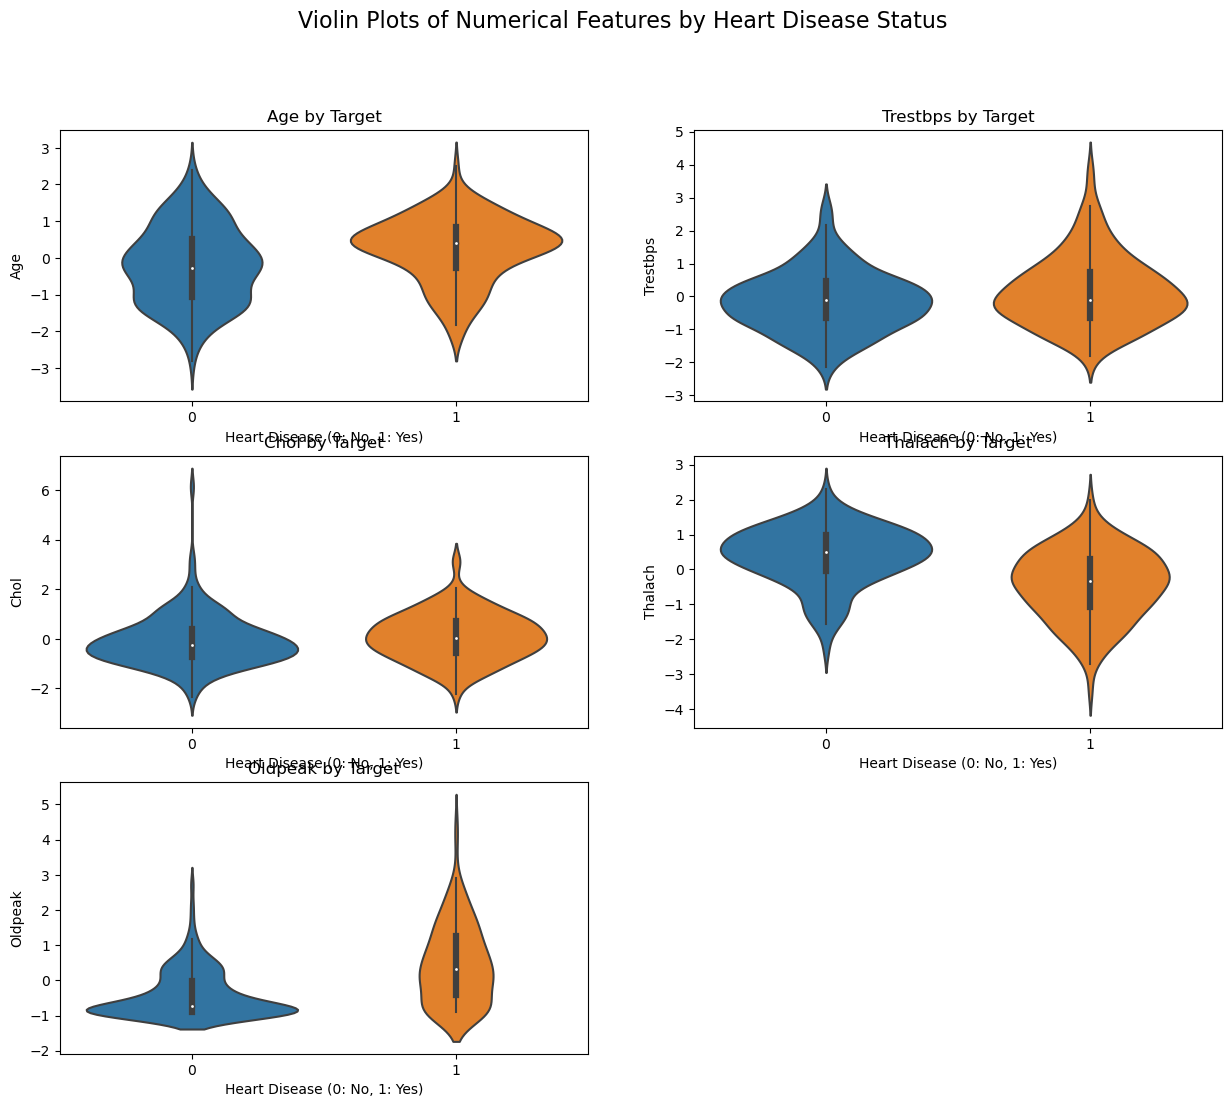

In [103]:
plt.figure(figsize=(15, 12))
plt.suptitle("Violin Plots of Numerical Features by Heart Disease Status", fontsize=16)

for i, feature in enumerate(numeric_features):
    plt.subplot((len(numeric_features) + 1) // 2, 2, i + 1)  
    sns.violinplot(data=df, x="target", y=feature, inner="box")
    plt.title(f"{feature.capitalize()} by Target")
    plt.xlabel("Heart Disease (0: No, 1: Yes)")
    plt.ylabel(feature.capitalize())


plt.show()

These violin plots provide a comprehensive view of how each numerical feature varies between the two target categories, offering insights into potential risk factors associated with heart disease.

# COUNT PLOT

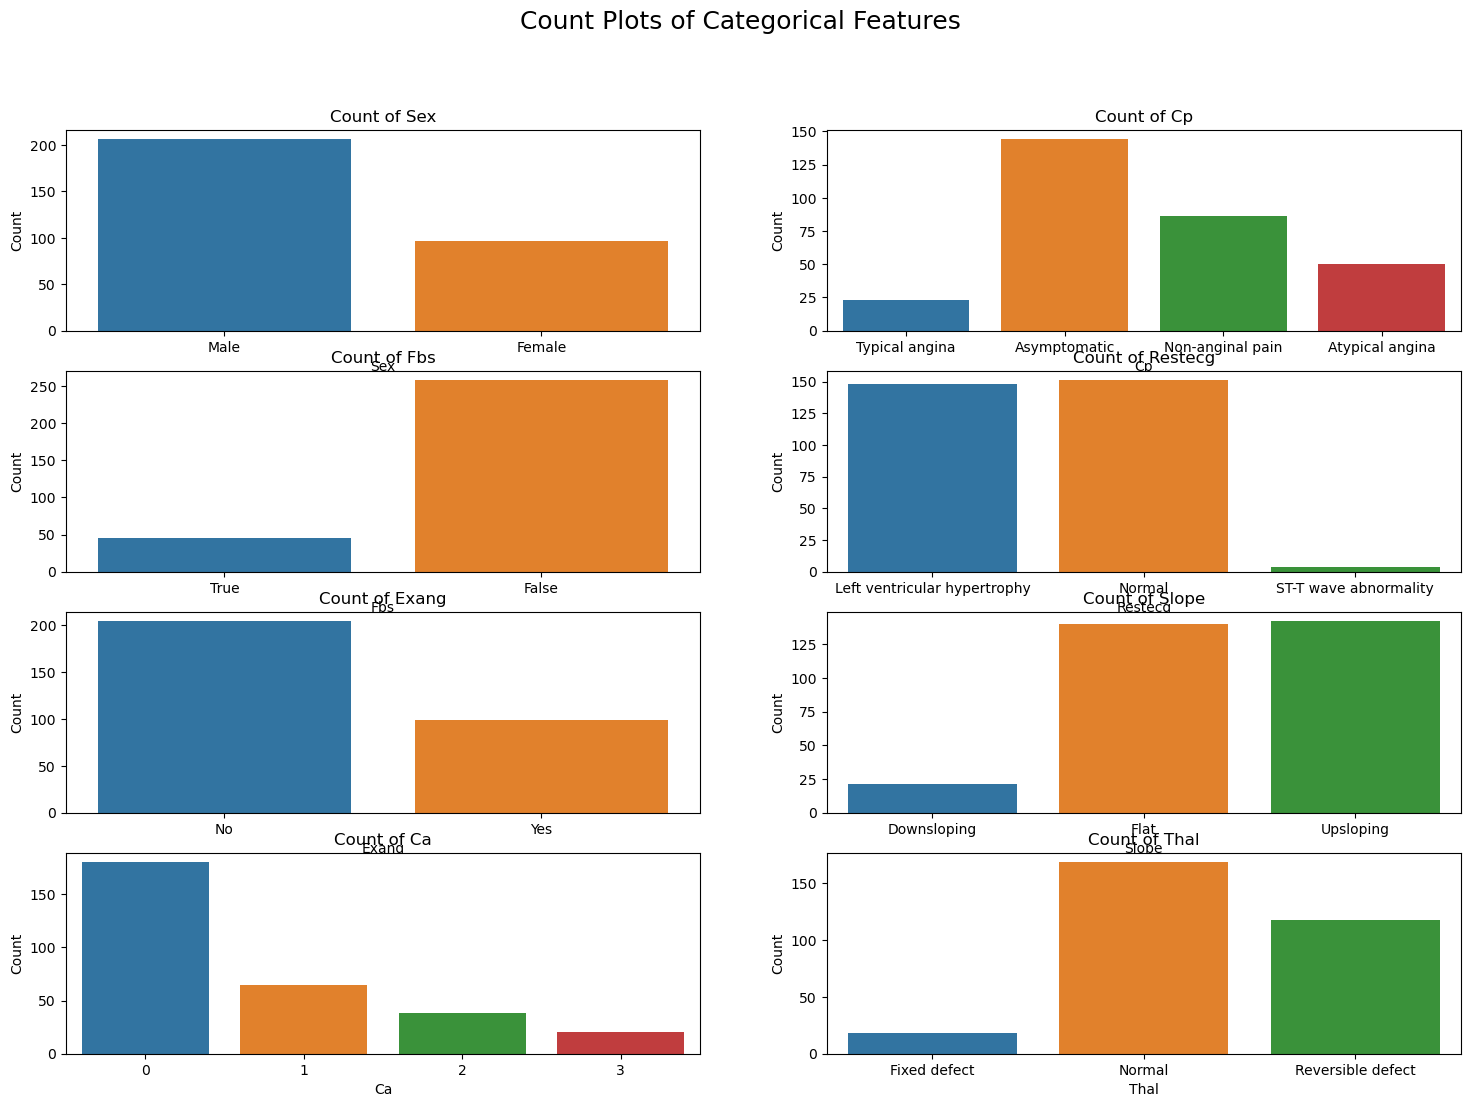

In [104]:
plt.figure(figsize=(18, 12))
plt.suptitle("Count Plots of Categorical Features", fontsize=18)

for i, feature in enumerate(categorical_features):
    plt.subplot((len(categorical_features) + 1) // 2, 2, i + 1)  
    sns.countplot(data=df, x=feature)
    plt.title(f"Count of {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
plt.show()

From the count plot it is clear that the data contain more male patients compared to that of female patients.The most common type of Chest pain is typical angina followed by non anginal pain and also typical angina is more prevalent among all the patients in the dataset.Fasting blood pressure:The majority of patients have fasting blood sugar levels below 120 mg/dl, indicating that elevated fasting blood sugar is less common.More patients did not experience exercise-induced angina compared to those who did.In slope the flat category is the most frequent, suggesting that many patients experience a flat slope during peak exercise, which may indicate heart problems.Also the majority of patients have 0 major vessels colored by fluoroscopy, with fewer patients having more vessels colored.In case of Thalassemia, Most patients have a 3 (reversible defect) type of thalassemia, which suggests a significant presence of blood flow issues in this population.

# BAR PLOT 

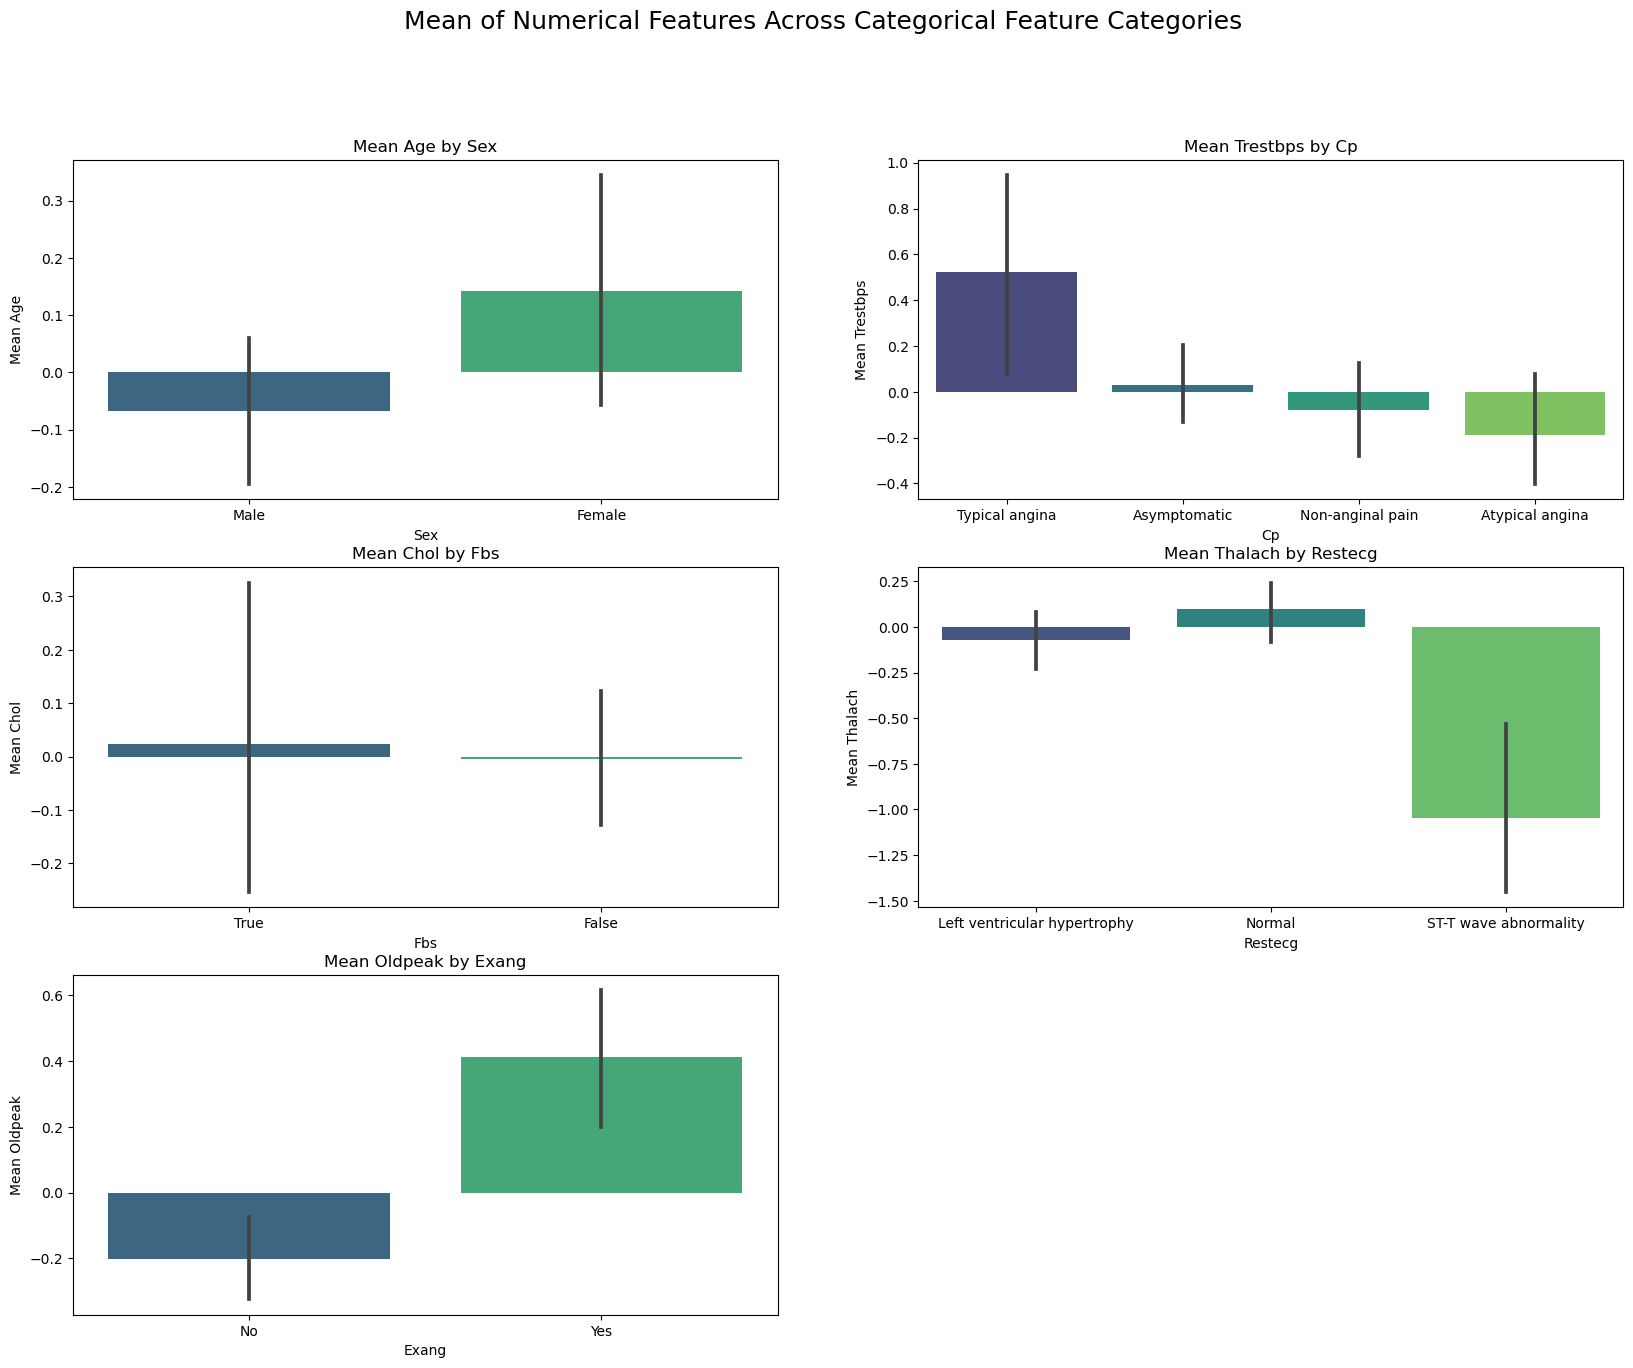

In [105]:
plt.figure(figsize=(20, 15))
plt.suptitle("Mean of Numerical Features Across Categorical Feature Categories", fontsize=18)

for i, num_feature in enumerate(numeric_features):
    plt.subplot((len(numeric_features) + 1) // 2, 2, i + 1)  
    sns.barplot(data=df, x=categorical_features[i % len(categorical_features)], y=num_feature, estimator='mean', palette="viridis")
    plt.title(f"Mean {num_feature.capitalize()} by {categorical_features[i % len(categorical_features)].capitalize()}")
    plt.xlabel(categorical_features[i % len(categorical_features)].capitalize())
    plt.ylabel(f"Mean {num_feature.capitalize()}")

plt.show()
#compare the mean of numerical features across different categories.

This plot always helps in finding a comparison of the values like mean or sum of the numerical features across different cotegories or categorical features,But in the visualisation different features behave across patient groups, potentially guiding further analysis or clinical decision-making.

# DENSITY PLOT

Helps in identifying the probability density function (PDF) of each features.

AGE

<Axes: xlabel='age', ylabel='Density'>

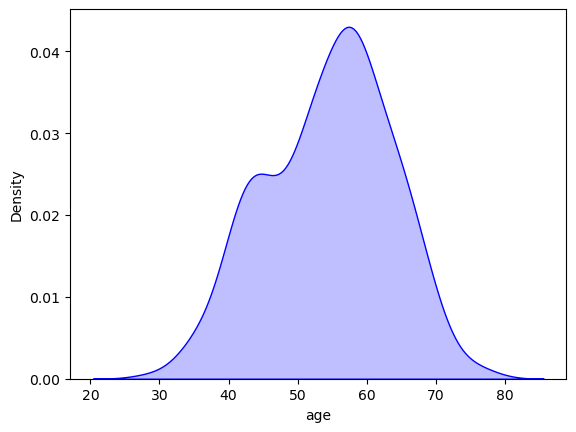

In [112]:
 sns.kdeplot(dataold["age"], fill=True, color="blue")


This distribution appers to be nearly normal having a peak nearly at the age of 60's which shows that this dataset is provinding evidence of having high probability that a person at this age is having high chances of getting a heart disease. 

RESTING BLOOD PRESSURE

<Axes: xlabel='trestbps', ylabel='Density'>

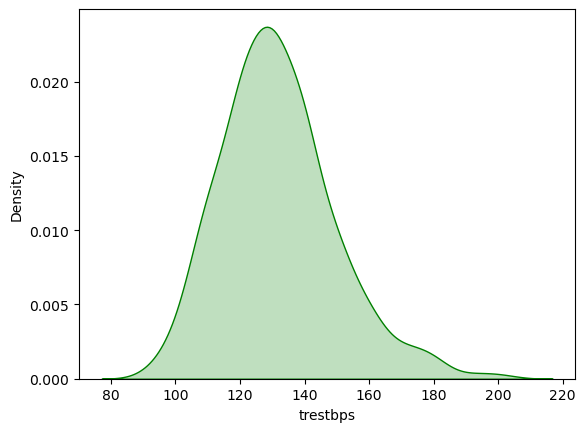

In [111]:
sns.kdeplot(dataold["trestbps"], fill=True, color="green")

A peak is present around 120-140 mm hg.This is slightly abough the range of normal blood pressure,that means the person will be having an elevated blood pressure, which is a factor that can lead to heart disease,

Serum Cholesterol(Chol)

<Axes: xlabel='chol', ylabel='Density'>

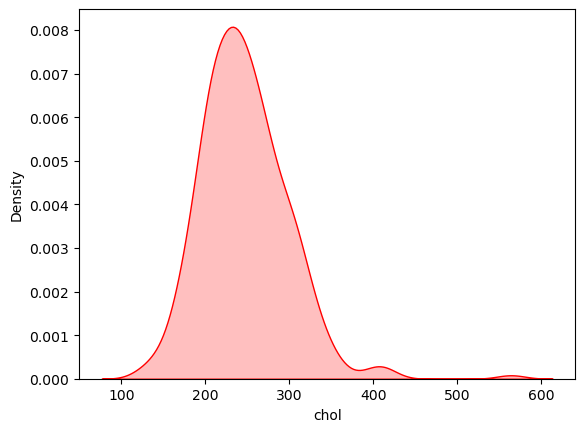

In [113]:
sns.kdeplot(dataold["chol"], fill=True, color="red")


It shows a broad peak at 200-250 mg/dL with an extended tail to the upper values which indicates a wide variation in the chelestrol level which is a risk factor for heart diseases.

Maximum heart rate achieved(Thalach)

<Axes: xlabel='thalach', ylabel='Density'>

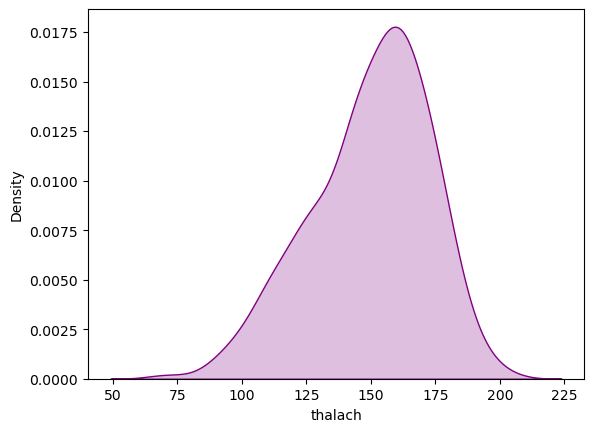

In [115]:
sns.kdeplot(dataold["thalach"], fill=True, color="purple")


This is skewed to left with most values between 100 and 200 per minute.That indicates most of the patients were having higher heart rate.These things indicate an underlying possibility of occurence of a heart disease.

ST Depression Induced by Exercise (oldpeak)

<Axes: xlabel='thalach', ylabel='Density'>

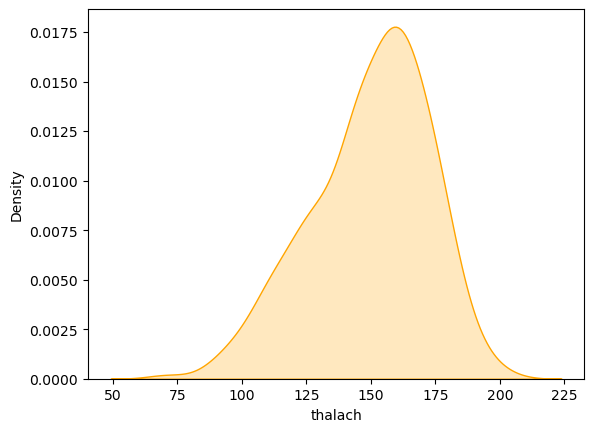

In [122]:
sns.kdeplot(dataold["thalach"], fill=True, color="orange")


This variable measures ST depression induced by exercise, with higher values indicating worse outcomes. The low values suggest that many patients experienced minimal ST depression, but there are still a number of cases with higher ST depression, which could be a sign of more severe heart disease.


Combined Density Chart

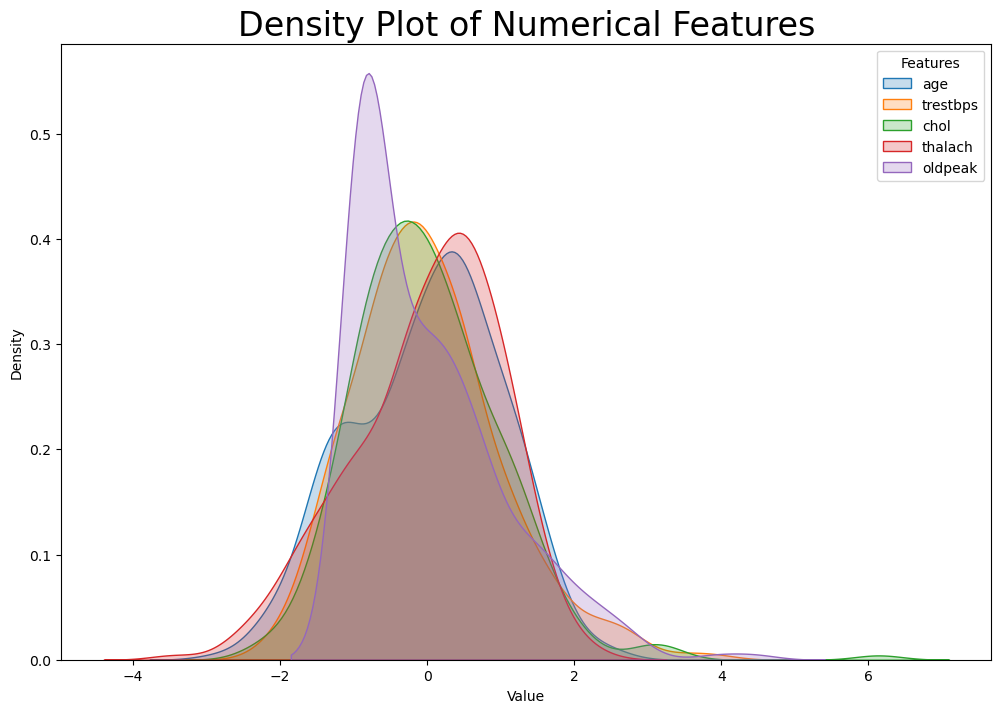

In [121]:
plt.figure(figsize=(12, 8))
plt.title("Density Plot of Numerical Features", fontsize=24)

for feature in numeric_features:
    sns.kdeplot(df[feature], fill=True, label=feature)
    
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(title="Features")
plt.show()

The exploratory data analysis (EDA) conducted on the Cleveland Heart Disease dataset reveals several key insights into the relationships between numerical features and the presence of heart disease. The box plots show that certain features, such as maximum heart rate (thalach) and ST depression induced by exercise (oldpeak), exhibit more distinct distributions between individuals with and without heart disease. For instance, patients with heart disease tend to have lower maximum heart rates and higher ST depression values, indicating that these features could be strong indicators of cardiac issues. Other features, like age and cholesterol levels, show more overlap between the two groups but still present slight differences that could be relevant in a predictive context.

Overall, the EDA highlights the importance of these numerical features in differentiating between patients with and without heart disease, suggesting that they may be valuable predictors in a machine learning model. The visualizations provide a clear understanding of the data's structure and suggest that while some features are more predictive than others, all contribute to understanding the underlying patterns associated with heart disease. This analysis lays the groundwork for building and refining predictive models, ensuring that feature selection is informed by data-driven insights.